In [1]:
import tensorflow as tf
import cv2
import numpy as np
import matplotlib.pyplot as plt


In [2]:
fldr="UTKFace"

In [3]:
import os
flies=os.listdir(fldr)

In [4]:
ages=[]
genders=[]
images=[]
for fle in flies:
    age=int(fle.split('_')[0])
    gender=int(fle.split('_')[1])
    total=fldr+'/'+fle
    print(total)
    image=cv2.imread(total)
    
    image=cv2.cvtColor(image,cv2.COLOR_BGR2RGB)
    image=cv2.resize(image,(48,48))
    images.append(image)

UTKFace/100_0_0_20170112213500903.jpg.chip.jpg
UTKFace/100_0_0_20170112215240346.jpg.chip.jpg
UTKFace/100_1_0_20170110183726390.jpg.chip.jpg
UTKFace/100_1_0_20170112213001988.jpg.chip.jpg
UTKFace/100_1_0_20170112213303693.jpg.chip.jpg
UTKFace/100_1_0_20170112215032192.jpg.chip.jpg
UTKFace/100_1_0_20170117195420803.jpg.chip.jpg
UTKFace/100_1_0_20170119212053665.jpg.chip.jpg
UTKFace/100_1_2_20170105174847679.jpg.chip.jpg
UTKFace/100_1_2_20170112213615815.jpg.chip.jpg
UTKFace/100_1_2_20170112222336458.jpg.chip.jpg
UTKFace/101_0_0_20170112213500903.jpg.chip.jpg
UTKFace/101_1_2_20170105174739309.jpg.chip.jpg
UTKFace/103_0_2_20170112213001988.jpg.chip.jpg
UTKFace/105_0_0_20170112213001988.jpg.chip.jpg
UTKFace/105_1_0_20170112213001988.jpg.chip.jpg
UTKFace/105_1_0_20170112213021902.jpg.chip.jpg
UTKFace/105_1_0_20170112213507183.jpg.chip.jpg
UTKFace/105_1_1_20170112213303693.jpg.chip.jpg
UTKFace/10_0_0_20161220222308131.jpg.chip.jpg
UTKFace/10_0_0_20170103200329407.jpg.chip.jpg
UTKFace/10_0_0_

In [5]:
for fle in flies:
    age=int(fle.split('_')[0])
    gender=int(fle.split('_')[1])
    ages.append(age)
    genders.append(gender)

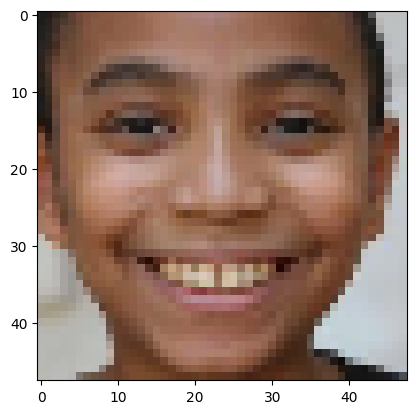

In [6]:
plt.imshow(images[87])

In [7]:
print(ages[87])

10


In [8]:
print(genders[87])

0


In [9]:
images_f=np.array(images)
ages_f=np.array(ages)
genders_f=np.array(genders)

# saving image arrsy ,age array and gender array in system

In [10]:
np.save(fldr+'images.npy',images_f)
np.save(fldr+'ages.npy',ages_f)
np.save(fldr+'genders.npy',genders_f)

# finding the no of element in the dataset

In [11]:
values,counts=np.unique(genders_f,return_counts=True)
print(counts)

[12391 11317]


## ploting the no of male and female in sample

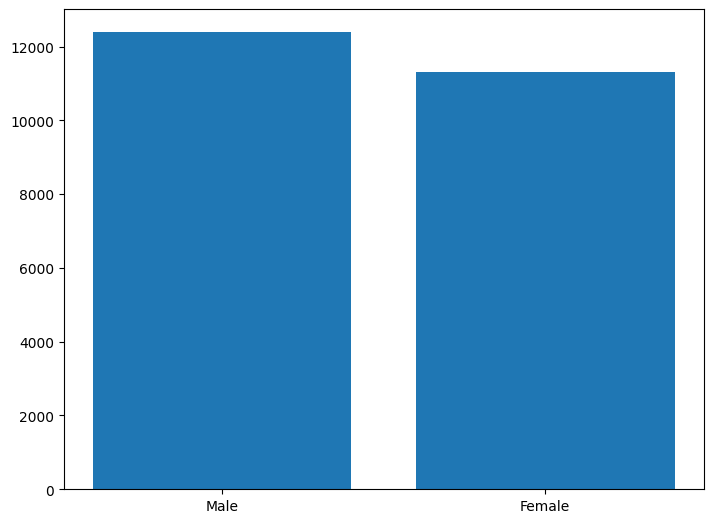

In [12]:
fig=plt.figure()
ax=fig.add_axes([0,0,1,1])
gender=['Male','Female']
values=[12391, 11317]
ax.bar(gender,values)
plt.show()

# finding the no of sample in each age

In [13]:
values,counts=np.unique(ages_f,return_counts=True)
print(counts)

[1123  482  289  273  196  131  139  263  166  156   65  130   81  157
  177  247  158  262   98  284  346  395  426  859  734 2197  615  918
  570  724  350  664  143  409  880  483  293  325  266  526  132  266
  157  100  440  153  170  153  148  381  138  232  241  353  268  236
   97  271   82  293  161  125  103   50  259   77   94  100   56  147
   33   98   63   32  148   58   28   69   23  133   22   40   18   24
  155   35   10   34   33   82    2   13    5    9   17    9   11    2
    1    5    5    1    3    4]


# converting the age counts to list

In [14]:
val=values.tolist()
cnt=counts.tolist()

# ploting the sample agewise

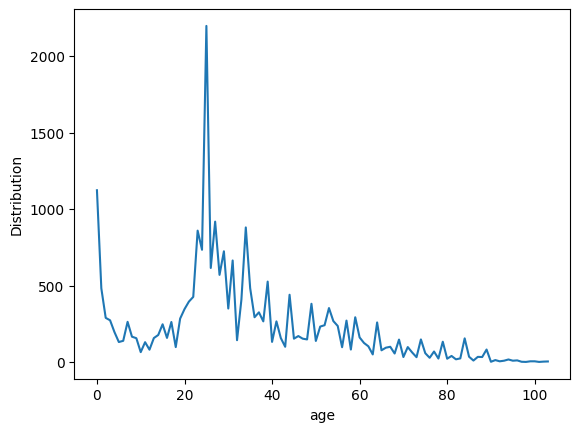

In [15]:
plt.plot(counts)
plt.xlabel('age')
plt.ylabel('Distribution')
plt.show()

## difing labels for output

In [16]:
lebles=[]
i=0
while i<len(ages):
    lebel=[]
    lebel.append(ages[i])
    lebel.append(genders[i])
    lebles.append(lebel)
    i=i+1
    

## creating another list of images from existing one
### for better learning

In [17]:
images_f_2=images_f/255

In [18]:
images_f_2.shape

(23708, 48, 48, 3)

In [19]:
lebles_f=np.array(lebles)

In [20]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(images_f_2,lebles_f,test_size=0.25)

In [21]:
y_train[0:5]

array([[25,  0],
       [34,  0],
       [29,  0],
       [34,  1],
       [36,  0]])

In [22]:
y_train_2=[y_train[:,1],y_train[:,0]]
y_test_2=[y_test[:,1],y_test[:,0]]

In [23]:
y_train_2[0][0:5]

array([0, 0, 0, 1, 0])

In [24]:
y_train_2[1][0:5]

array([25, 34, 29, 34, 36])

# difining the model

In [25]:
from tensorflow import keras
from keras.regularizers import l2

def Convolution(input_tensor,filters):
    x=keras.layers.Conv2D(filters=filters,kernel_size=(3,3),padding="same",strides=(1,1),kernel_regularizer=l2(0.01))(input_tensor)
    x=keras.layers.Dropout(0.1)(x)
    x=keras.layers.Activation('relu')(x)
    return x

In [26]:
def model(input_shape):
    inputs=keras.layers.Input((input_shape))
    conv_1=Convolution(inputs,32)
    maxp_1=keras.layers.MaxPooling2D(pool_size=(2,2))(conv_1)
    conv_2=Convolution(maxp_1,64)
    maxp_2=keras.layers.MaxPooling2D(pool_size=(2,2))(conv_2)
    conv_3=Convolution(maxp_2,128)
    maxp_3=keras.layers.MaxPooling2D(pool_size=(2,2))(conv_3)
    conv_4=Convolution(maxp_3,256)
    maxp_4=keras.layers.MaxPooling2D(pool_size=(2,2))(conv_4)    
    flatten=keras.layers.Flatten()(maxp_4)
    dense_1=keras.layers.Dense(64,activation='relu')(flatten)
    dense_2=keras.layers.Dense(64,activation='relu')(flatten)
    drop_1=keras.layers.Dropout(0.2)(dense_1)
    drop_2=keras.layers.Dropout(0.2)(dense_2)
    output_1=keras.layers.Dense(1,activation='sigmoid',name='sex_out')(drop_1)
    output_2=keras.layers.Dense(1,activation='relu',name='age_out')(drop_2)
    model=keras.Model(inputs=[inputs],outputs=[output_1,output_2])
    model.compile(loss=['binary_crossentropy',"mae"],optimizer="Adam",metrics=["accuracy"])   
    return model

In [27]:
Model=model((48,48,3))

In [28]:
Model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 48, 48, 3)]          0         []                            
                                                                                                  
 conv2d (Conv2D)             (None, 48, 48, 32)           896       ['input_1[0][0]']             
                                                                                                  
 dropout (Dropout)           (None, 48, 48, 32)           0         ['conv2d[0][0]']              
                                                                                                  
 activation (Activation)     (None, 48, 48, 32)           0         ['dropout[0][0]']             
                                                                                              

In [29]:
from keras.callbacks import ModelCheckpoint



In [30]:
fle_s='Age_sex_Detection.h5'
checkpoint=ModelCheckpoint(fle_s,monitor='val_loss',verbose=1,save_best_only=True,save_weights_only=False,mode='auto',save_freq='epoch')
Early_stop=keras.callbacks.EarlyStopping(patience=75,monitor='val_loss',restore_best_weights='True')
callback_list=[checkpoint,Early_stop]

In [31]:
History=Model.fit(x_train,y_train_2,batch_size=64,validation_data=(x_test,y_test_2),epochs=25,callbacks=callback_list)

Epoch 1/25
278/278 [==============================] - ETA: 0s - loss: 17.9131 - sex_out_loss: 0.6932 - age_out_loss: 16.0723 - sex_out_accuracy: 0.5268 - age_out_accuracy: 0.0470
Epoch 1: val_loss improved from inf to 17.04959, saving model to Age_sex_Detection.h5


C:\Users\hp\AppData\Roaming\Python\Python310\site-packages\keras\src\engine\training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


278/278 [==============================] - 195s 678ms/step - loss: 17.9131 - sex_out_loss: 0.6932 - age_out_loss: 16.0723 - sex_out_accuracy: 0.5268 - age_out_accuracy: 0.0470 - val_loss: 17.0496 - val_sex_out_loss: 0.6914 - val_age_out_loss: 15.6156 - val_sex_out_accuracy: 0.5178 - val_age_out_accuracy: 0.0483
Epoch 2/25
278/278 [==============================] - ETA: 0s - loss: 16.1009 - sex_out_loss: 0.6891 - age_out_loss: 14.7808 - sex_out_accuracy: 0.5225 - age_out_accuracy: 0.0471
Epoch 2: val_loss improved from 17.04959 to 16.04788, saving model to Age_sex_Detection.h5
278/278 [==============================] - 220s 792ms/step - loss: 16.1009 - sex_out_loss: 0.6891 - age_out_loss: 14.7808 - sex_out_accuracy: 0.5225 - age_out_accuracy: 0.0471 - val_loss: 16.0479 - val_sex_out_loss: 0.6841 - val_age_out_loss: 14.7788 - val_sex_out_accuracy: 0.5190 - val_age_out_accuracy: 0.0483
Epoch 3/25
278/278 [==============================] - ETA: 0s - loss: 13.9729 - sex_out_loss: 0.6240 - a

In [32]:
Model.evaluate(x_test,y_test_2)

186/186 [==============================] - 8s 45ms/step - loss: 9.7655 - sex_out_loss: 0.3258 - age_out_loss: 8.2746 - sex_out_accuracy: 0.8635 - age_out_accuracy: 0.0483


[9.765484809875488,
 0.3257957398891449,
 8.274604797363281,
 0.863506019115448,
 0.048253752291202545]

In [33]:
pred=Model.predict(x_test)

186/186 [==============================] - 8s 42ms/step


In [34]:
pred[1]

array([[23.513926 ],
       [27.621346 ],
       [ 1.1410953],
       ...,
       [25.333403 ],
       [40.68296  ],
       [ 1.127929 ]], dtype=float32)

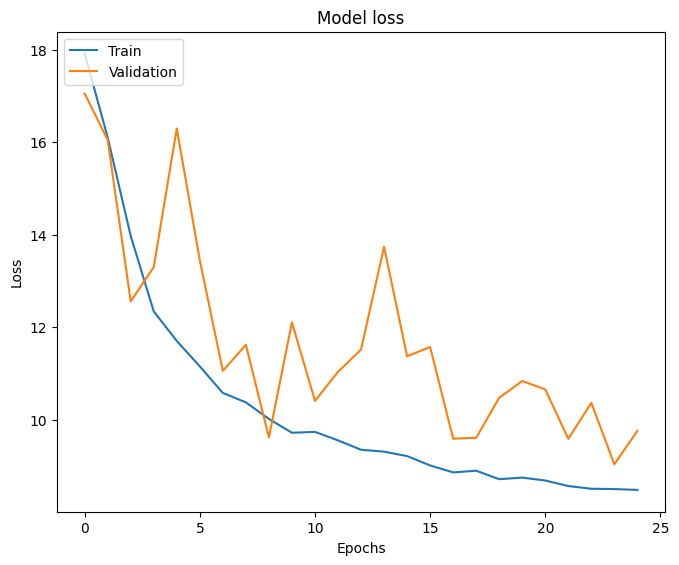

In [35]:
plt.plot(History.history['loss'])
plt.plot(History.history['val_loss'])
plt.title('Model loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(['Train','Validation'],loc='upper left')
plt.subplots_adjust(top=1.0,bottom=0.0,right=0.95,left=0,hspace=0.25,wspace=0.35)

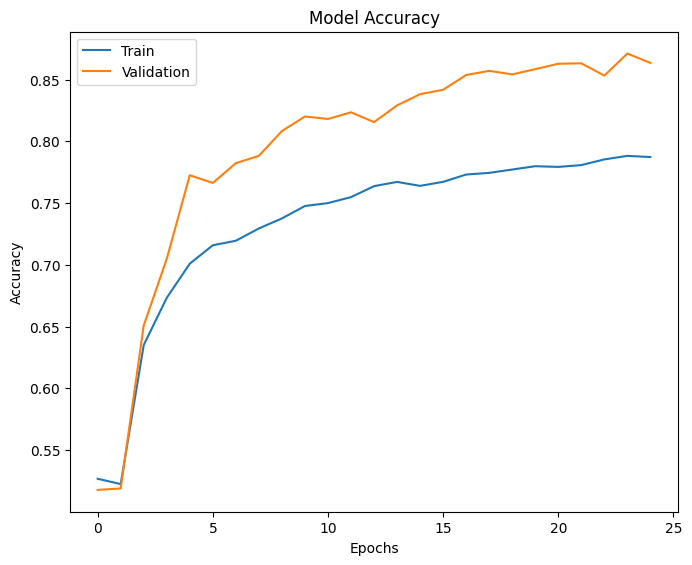

In [36]:
plt.plot(History.history['sex_out_accuracy'])
plt.plot(History.history['val_sex_out_accuracy'])
plt.title('Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(['Train','Validation'],loc='upper left')
plt.subplots_adjust(top=1.0,bottom=0.0,right=0.95,left=0,hspace=0.25,wspace=0.35)

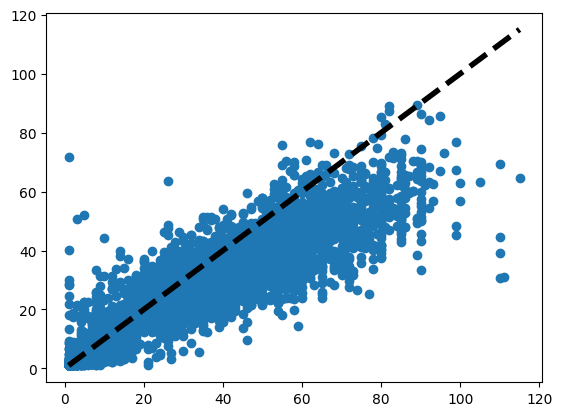

In [37]:
fig ,ax=plt.subplots()
ax.scatter(y_test_2[1],pred[1])
ax.plot([y_test_2[1].min(),y_test_2[1].max()],[y_test_2[1].min(),y_test_2[1].max()],'k--',lw=4)

In [38]:
i=0
pred_1=[]
while(i<len(pred[0])):
    pred_1.append(int(np.round(pred[0][i])))
    i=i+1

In [39]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [40]:
report=classification_report(y_test_2[0],pred_1)

In [41]:
print(report)

              precision    recall  f1-score   support

           0       0.84      0.91      0.87      3069
           1       0.89      0.82      0.85      2858

    accuracy                           0.86      5927
   macro avg       0.87      0.86      0.86      5927
weighted avg       0.87      0.86      0.86      5927



In [42]:
result=confusion_matrix(y_test_2[0],pred_1)

<Axes: >

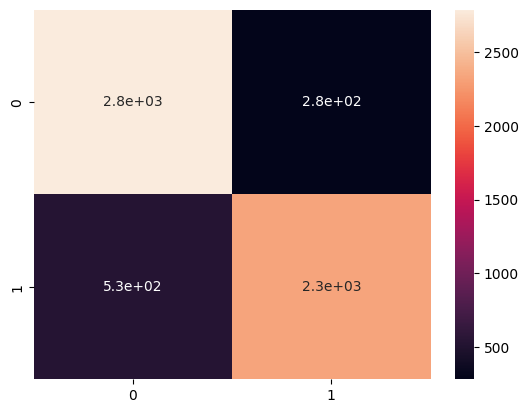

In [43]:
import seaborn as sns
sns.heatmap(result,annot=True)

In [44]:
def test_image(ind,images_f,images_f_2,Model):
    plt.imshow(images_f[ind])
    image_test=images_f_2[ind]
    pred_1=Model.predict(np.array([image_test]))
    sex_f=['Male','Female']
    age=int(np.round(pred_1[1][0]))
    sex=int(np.round(pred_1[0][0]))
    print("prediction Age is" +str(age))
    print("prediction gender is" + sex_f[sex])

# testing the model ourself

1/1 [==============================] - 0s 40ms/step
prediction Age is86
prediction gender isFemale


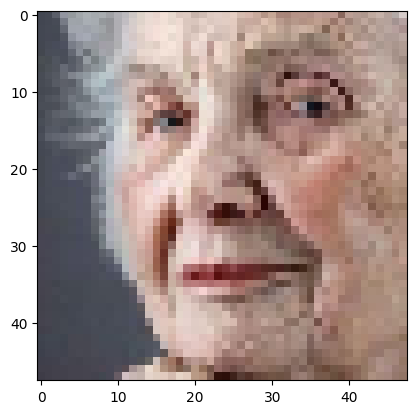

In [45]:
test_image(4,images_f,images_f_2,Model)

1/1 [==============================] - 0s 29ms/step
prediction Age is60
prediction gender isMale


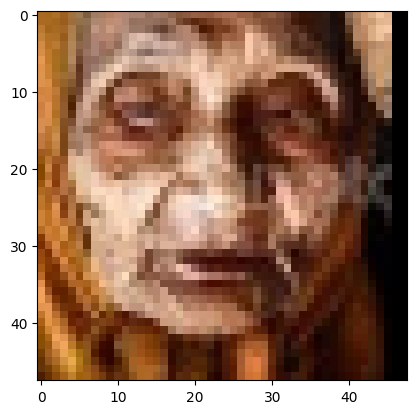

In [46]:
test_image(10,images_f,images_f_2,Model)

1/1 [==============================] - 0s 66ms/step
prediction Age is13
prediction gender isMale


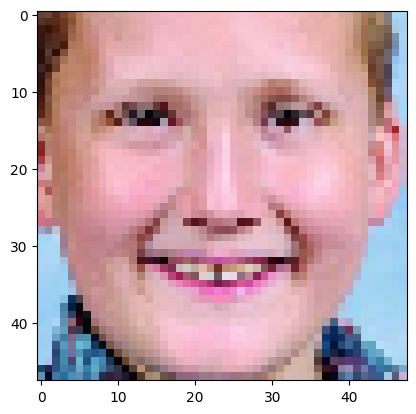

In [47]:
test_image(20,images_f,images_f_2,Model)

1/1 [==============================] - 0s 28ms/step
prediction Age is19
prediction gender isMale


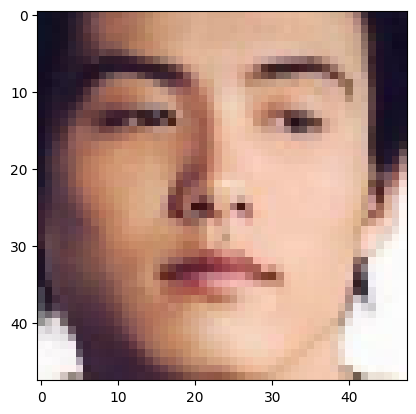

In [48]:
test_image(1255,images_f,images_f_2,Model)

1/1 [==============================] - 0s 28ms/step
prediction Age is12
prediction gender isFemale


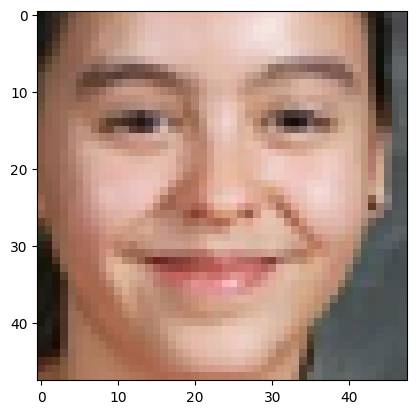

In [49]:
test_image(940,images_f,images_f_2,Model)